---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import random

In [3]:
np.random.binomial(1, 0.5) # First parameter is the number of times you want to run the test.

1

In [4]:
np.random.binomial(1000, 0.5)/1000 # Run the test 1000 times and divide by 1000. Answer close to 0.5 as expected.

0.503

In [5]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

13

In [6]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

111 tornadoes back to back in 2739.72602739726 years


In [7]:
np.random.uniform(0, 1)

0.6466299864750941

In [8]:
np.random.normal(0.75)

-0.7993582450000314

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [9]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.98455800156181117

In [10]:
np.std(distribution)

0.98455800156181117

In [11]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.13839293790781104

In [12]:
stats.skew(distribution)

0.0592003381008596

In [13]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.959633148623116

In [14]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2817283138369984

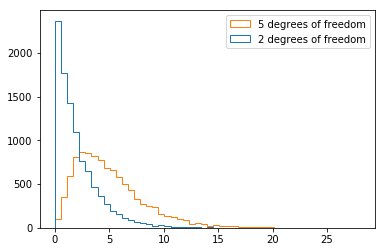

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [3]:
df = pd.read_csv('grades.csv')

In [4]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [6]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [7]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [8]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

# Statistical tests and forms a basis for hypothesis testing in Python and we are going to use ttest_ind() function which does an independent t-test (meaning the populations are not related to one another). The result of ttest _index() are the t-statistic and a p-value. It's this latter value, the probability, which is most important to us, as it indicates the chance (between 0 and 1) of our null hypotheses being True.

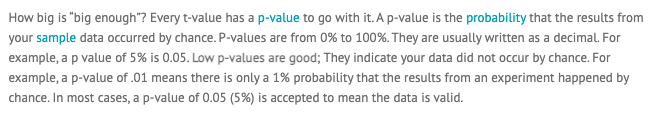

In [15]:
"""p value: the less the better, low possibility to happen by chance."""
print(stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade']))
print(stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade']))
print(stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade']))
print(stats.ttest_ind(early['assignment4_grade'], late['assignment4_grade']))
print(stats.ttest_ind(early['assignment5_grade'], late['assignment5_grade']))

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)
Ttest_indResult(statistic=1.323986822091257, pvalue=0.18563824610067958)
Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)
Ttest_indResult(statistic=0.16232182017140787, pvalue=0.8710666110447575)
Ttest_indResult(statistic=0.06063973879942835, pvalue=0.9516513635792874)


In [39]:
df2 = pd.DataFrame([np.random.random(40) for x in range(100)])
df2

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.934779,0.999147,0.516745,0.043906,0.872470,0.533458,0.004405,0.227290,0.863395,0.876881,...,0.428056,0.315661,0.850473,0.650600,0.172670,0.618234,0.003555,0.075149,0.441203,0.583064
1,0.568337,0.574460,0.659502,0.712367,0.110388,0.218457,0.192343,0.327345,0.009505,0.338185,...,0.677082,0.752716,0.859130,0.148289,0.679355,0.256120,0.698442,0.586686,0.030407,0.564333
2,0.833563,0.838515,0.555877,0.948578,0.016280,0.245019,0.780039,0.245152,0.736549,0.040226,...,0.178079,0.726246,0.643816,0.216974,0.866469,0.471398,0.225849,0.599948,0.244132,0.739574
3,0.508938,0.274465,0.111536,0.960673,0.081114,0.333911,0.697602,0.016255,0.763451,0.748988,...,0.885378,0.551693,0.179824,0.611598,0.708562,0.296295,0.181961,0.036137,0.341383,0.829684
4,0.719435,0.075030,0.894745,0.943507,0.245472,0.005945,0.803169,0.469421,0.544706,0.652826,...,0.864401,0.360923,0.497277,0.662578,0.050956,0.585344,0.245555,0.484373,0.107505,0.354077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.982249,0.710949,0.500357,0.066422,0.326572,0.235105,0.841289,0.049776,0.130200,0.415651,...,0.370098,0.804226,0.145627,0.816205,0.563536,0.147224,0.578802,0.139343,0.746080,0.391696
96,0.800254,0.885065,0.394411,0.103123,0.297022,0.866981,0.678085,0.226540,0.687755,0.475274,...,0.780444,0.570434,0.240637,0.451974,0.357636,0.890949,0.328481,0.172599,0.668304,0.894849
97,0.516661,0.987739,0.014335,0.988979,0.554869,0.685345,0.564814,0.203119,0.056198,0.112615,...,0.796512,0.391730,0.279385,0.116249,0.827585,0.337081,0.522220,0.296440,0.841951,0.149723
98,0.651646,0.860475,0.908148,0.249877,0.335022,0.052807,0.815536,0.543984,0.233439,0.100086,...,0.878851,0.936578,0.579312,0.277924,0.822660,0.227527,0.824517,0.827093,0.776216,0.755967
